# AI 688-001: Image and Vision Computing

## Midterm Project

### Instructor: Mathieu Le Provost
Spring 2023

Load some libraries

In [1]:
import numpy as np
import math
import random
import unittest
import os
import cv2
import sys
import matplotlib.pyplot as plt

**TODO:** Enter your name, email, and LIU ID

In [2]:
name = "John Doe"

In [3]:
email = "student@my.liu.edu"

In [4]:
LIUID = "0000000007"

## Problem 1: Chroma Key

####  Step 1:
Load the “lady” image and the background image into Python using the command `cv2.imread`

In [5]:
#Loads the lady image as BGR
lady = cv2.imread('lady.jpg')

#  Convert `lady` to RGB
lady_rgb = cv2.cvtColor(lady, cv2.COLOR_BGR2RGB) 

Note that `cv2` loads the image in the BGR format instead of the usual RGB format

In [6]:
#Loads the background image as BGR
background = cv2.imread('shark.jpg') # Modify the code 

background_rgb = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

####  Step 2:
Find the dimensions of each image. You can obtain the dimensions of an image `f` with the command `f.shape`

In [7]:
lady_dim = lady_rgb.shape# Write your code here
print(lady_dim)

(700, 1024, 3)


In [8]:
background_dim = background_rgb.shape# Write your code here
print(background_dim)

(768, 1024, 3)


#### Step 3: 
Change the dimensions of your background image to be the same as the `lady` image by using the command `cv2.resize`. 

In [9]:
background_resized = cv2.resize(background_rgb, (1024, 700),interpolation = cv2.INTER_AREA)

Check that `background_resized` has the same dimensions than the image `lady`.

In [10]:
background_resized.shape == lady.shape

True

#### Step 4:
Display the `lady` image. If the plot looks weird with the lady in blue, you forgot to convert the images from the BGR format to the RGB format.

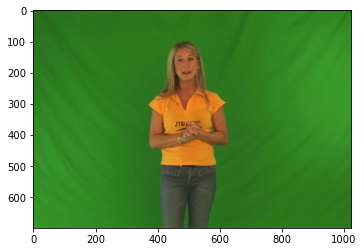

In [11]:
# Write your code here
plt.imshow(lady_rgb)

Display the `resized_background` image.

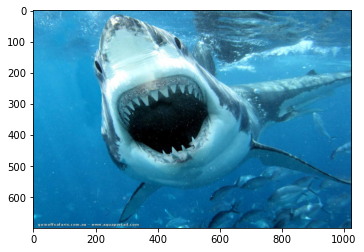

In [12]:
# Write your code here
plt.imshow(background_resized)

#### Step 5:

Convert the images `lady` and `background_resized` from the BGR color format to the YCbCR color format.

In [13]:
lady_ycbcr = cv2.cvtColor(lady, cv2.COLOR_BGR2YCR_CB)

In [14]:
background_resized = cv2.resize(background, (1024, 700),interpolation = cv2.INTER_AREA)
background_ycbcr = cv2.cvtColor(background_resized, cv2.COLOR_BGR2YCR_CB)

#### Step 6:

Estimate $\beta$ from 3 representative points in the green region of the background. Just execute these cells.

The red dots on the image indicates the three sampling color for the green background

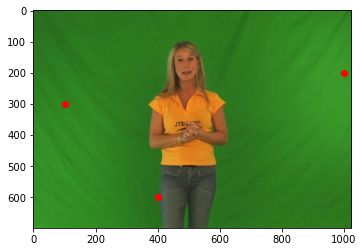

In [15]:
plt.imshow(cv2.cvtColor(lady, cv2.COLOR_BGR2RGB))
plt.plot([100], [300], 'ro')
plt.plot([1000], [200], 'ro')
plt.plot([400], [600], 'ro')
#plt.plot([700], [800], 'ro')

In [16]:
beta_ycbcr = np.int8(1/3*(np.float32(lady_ycbcr[300, 100, :]) + np.float32(lady_ycbcr[200, 1000, :]) + np.float32(lady_ycbcr[600, 400, :])))
print(beta_ycbcr)

[96 94 93]


`beta_ycbcr` is in the YCbCr format.

#### Step 7: 
Calculate the distance matrix `d` using the equation (1) given in the companion document.

In [17]:
d = np.zeros((lady.shape[0], lady.shape[1]))

for i in range(lady_ycbcr.shape[0]):
    for j in range(lady_ycbcr.shape[1]):
        d[i,j] = math.sqrt(((lady_ycbcr[i][j][1] - beta_ycbcr[1])**2) + ((lady_ycbcr[i][j][2] - beta_ycbcr[2])**2))# Complete the code

Display the distance matrix `d`

In [18]:
# Write your code here
print(d)

[[9.89949494 9.89949494 9.89949494 ... 4.24264069 4.24264069 4.24264069]
 [9.89949494 9.89949494 9.89949494 ... 4.24264069 4.24264069 4.24264069]
 [9.89949494 9.89949494 9.89949494 ... 4.24264069 4.24264069 4.24264069]
 ...
 [7.81024968 7.81024968 7.81024968 ... 7.21110255 7.21110255 7.21110255]
 [7.81024968 7.81024968 7.81024968 ... 7.21110255 7.21110255 7.21110255]
 [7.81024968 7.81024968 7.81024968 ... 7.21110255 7.21110255 7.21110255]]


#### Step 8:

Compute the mask matrix `alpha` using equation (3) of the companion document

Use the following thresholds `T1` and `T2` to compute `alpha`

In [19]:
T1 = 10
T2 = 40

In [20]:
alpha = np.zeros((lady.shape[0], lady.shape[1]))

for i in range(alpha.shape[0]):
    for j in range(alpha.shape[1]):
        # Complete the code
        if (d[i][j] > T2):
            alpha[i,j] = 1
        elif (d[i][j] < T1):
            alpha[i,j] = 0
        elif (d[i][j] < T2 and d[i][j] > T1):
            alpha[i][j] = (d[i][j] - T1)/(T2 - T1)
            

Plot the mask matrix `alpha`

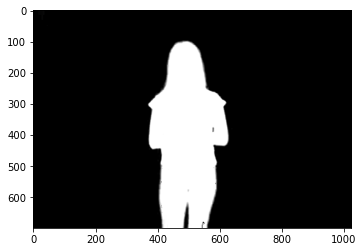

In [22]:
# Write your code here
plt.imshow(alpha, cmap='gray')

Does the mask `alpha` look right?

In [24]:
# Write your answer here
print("Yes, the image gives the desired separation of colors and the desired output in the end.")

Yes, the image gives the desired separation of colors and the desired output in the end.


#### Step 9:

Compute the composite image `composite_ycbcr` (in the YCbCr format) according to equation (2) given in the companion document. 

In [25]:
composite_ycbcr = np.zeros((lady_ycbcr.shape[0], lady_ycbcr.shape[1], lady_ycbcr.shape[2]), dtype = np.uint8)

for i in range(composite_ycbcr.shape[0]):
    for j in range(composite_ycbcr.shape[1]):
        for k in range(composite_ycbcr.shape[2]):
            composite_ycbcr[i,j,k] = ((alpha[i][j]*lady_ycbcr[i][j][k]) + (1 - alpha[i][j])*background_ycbcr[i][j][k])# Complete the code

Convert `composite_ycbcr` to the RGB format color to display it, call it `composive_rgb`

In [26]:
composite_rgb = cv2.cvtColor(composite_ycbcr, cv2.COLOR_YCrCb2RGB)# Complete the code

#### Step 10:

Display `composite_rgb`

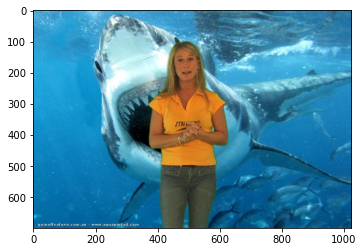

In [27]:
#Write your code here
plt.imshow(composite_rgb)